importing the necesaary libararies and creating the dataframe from imported data

In [141]:
import pandas as pd
import numpy as np

In [142]:
automobile_df = pd.read_csv('Automobile_data.csv')

In [143]:
type(automobile_df)

pandas.core.frame.DataFrame

accessing basic information about the dataframe

In [144]:
automobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [145]:
automobile_df.sample(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
182,2,122,volkswagen,diesel,std,two,sedan,fwd,front,97.3,...,97,idi,3.01,3.4,23.0,52,4800,37,46,7775
76,2,161,mitsubishi,gas,std,two,hatchback,fwd,front,93.7,...,92,2bbl,2.97,3.23,9.4,68,5500,37,41,5389
194,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940
135,2,104,saab,gas,std,four,sedan,fwd,front,99.1,...,121,mpfi,3.54,3.07,9.3,110,5250,21,28,15510
42,1,107,honda,gas,std,two,sedan,fwd,front,96.5,...,110,2bbl,3.15,3.58,9.1,100,5500,25,31,10345


In [146]:
automobile_df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [147]:
type(automobile_df.columns)

pandas.core.indexes.base.Index

from the data we see the information is based on 3 properties:
1. car xtics (this is most of the columns except 2 columns)
2. insurance riskiness ( represented by symboling column) : how risky the car is compared to its price
3. normalised loss( represented by normalised loss colunmn) : relative average loss per insured vehicle per year

### Data cleaning

* the rows dont contain any null values
* there are columns with the wrong data types which will make analysis difficult so that data types will be converted accordingly before futher analysis

In [148]:
automobile_df['normalized-losses'].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

filling in the missing values

In [149]:
automobile_df['normalized-losses'] = automobile_df['normalized-losses'].replace('?',np.nan)

In [150]:
automobile_df['normalized-losses'] = automobile_df['normalized-losses'].astype('Int64')

In [151]:
automobile_df['normalized-losses'].sample(20)

154      81
137     104
179     197
74     <NA>
27      148
155      91
0      <NA>
49     <NA>
12      188
43     <NA>
62      115
140      83
68       93
11      192
79      161
131    <NA>
108     161
188      94
52      104
130    <NA>
Name: normalized-losses, dtype: Int64

In [152]:
automobile_df['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [153]:
automobile_df['bore'].unique()

array(['3.47', '2.68', '3.19', '3.13', '3.5', '3.31', '3.62', '2.91',
       '3.03', '2.97', '3.34', '3.6', '2.92', '3.15', '3.43', '3.63',
       '3.54', '3.08', '?', '3.39', '3.76', '3.58', '3.46', '3.8', '3.78',
       '3.17', '3.35', '3.59', '2.99', '3.33', '3.7', '3.61', '3.94',
       '3.74', '2.54', '3.05', '3.27', '3.24', '3.01'], dtype=object)

In [154]:
automobile_df['bore'] = automobile_df['bore'].replace('?',np.nan)
automobile_df['bore'] = automobile_df['bore'].astype('float64')

In [155]:
automobile_df.bore.sample(20)

125    3.94
187    3.01
36     2.92
6      3.19
170    3.62
32     2.91
34     2.91
149    3.62
18     2.91
186    3.19
121    2.97
117    3.61
69     3.58
91     3.15
136    3.54
160    3.19
171    3.62
82     3.58
108    3.70
42     3.15
Name: bore, dtype: float64

In [156]:
automobile_df.stroke.unique()

array(['2.68', '3.47', '3.4', '2.8', '3.19', '3.39', '3.03', '3.11',
       '3.23', '3.46', '3.9', '3.41', '3.07', '3.58', '4.17', '2.76',
       '3.15', '?', '3.16', '3.64', '3.1', '3.35', '3.12', '3.86', '3.29',
       '3.27', '3.52', '2.19', '3.21', '2.9', '2.07', '2.36', '2.64',
       '3.08', '3.5', '3.54', '2.87'], dtype=object)

In [157]:
automobile_df.stroke = automobile_df.stroke.replace("?",np.nan)
automobile_df.stroke = automobile_df.stroke.astype('float64')

In [158]:
automobile_df.stroke.sample(10)

101    3.27
20     3.11
57      NaN
127    2.90
106    3.27
123    3.46
122    3.23
10     2.80
38     3.58
177    3.54
Name: stroke, dtype: float64

In [159]:
automobile_df.horsepower.unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', '?', '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [160]:
automobile_df.horsepower = automobile_df.horsepower.replace('?',np.nan)
automobile_df.horsepower = automobile_df.horsepower.astype('Int64')

In [161]:
automobile_df.horsepower.sample(10)

137    160
98      69
30      58
3      102
190     90
101    152
65     120
27     102
163     70
151     62
Name: horsepower, dtype: Int64

In [162]:
automobile_df['peak-rpm'].unique()

array(['5000', '5500', '5800', '4250', '5400', '5100', '4800', '6000',
       '4750', '4650', '4200', '4350', '4500', '5200', '4150', '5600',
       '5900', '5750', '?', '5250', '4900', '4400', '6600', '5300'],
      dtype=object)

In [163]:
automobile_df['peak-rpm'] = automobile_df['peak-rpm'].replace('?',np.nan)
automobile_df['peak-rpm'] = automobile_df['peak-rpm'].astype('Int64')

In [164]:
automobile_df['peak-rpm'].sample(10)

77     5500
142    4400
184    4800
75     5000
156    4800
107    5000
18     5100
149    4800
58     6000
41     5800
Name: peak-rpm, dtype: Int64

In [165]:
automobile_df['price'].unique()

array(['13495', '16500', '13950', '17450', '15250', '17710', '18920',
       '23875', '?', '16430', '16925', '20970', '21105', '24565', '30760',
       '41315', '36880', '5151', '6295', '6575', '5572', '6377', '7957',
       '6229', '6692', '7609', '8558', '8921', '12964', '6479', '6855',
       '5399', '6529', '7129', '7295', '7895', '9095', '8845', '10295',
       '12945', '10345', '6785', '11048', '32250', '35550', '36000',
       '5195', '6095', '6795', '6695', '7395', '10945', '11845', '13645',
       '15645', '8495', '10595', '10245', '10795', '11245', '18280',
       '18344', '25552', '28248', '28176', '31600', '34184', '35056',
       '40960', '45400', '16503', '5389', '6189', '6669', '7689', '9959',
       '8499', '12629', '14869', '14489', '6989', '8189', '9279', '5499',
       '7099', '6649', '6849', '7349', '7299', '7799', '7499', '7999',
       '8249', '8949', '9549', '13499', '14399', '17199', '19699',
       '18399', '11900', '13200', '12440', '13860', '15580', '16900',


In [166]:
automobile_df['price'] = automobile_df['price'].replace('?',np.nan)
automobile_df['price'] = automobile_df['price'].astype('Int64')

In [167]:
automobile_df['price'].sample(20)

174    10698
185     8195
144     9233
89      5499
26      7609
0      13495
1      16500
119     7957
166     9538
55     10945
33      6529
32      5399
52      6795
79      7689
156     6938
53      6695
10     16430
139     7053
59      8845
106    18399
Name: price, dtype: Int64

In [168]:
automobile_df['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

converting columns with numbers in word form to integers

In [169]:
automobile_df['num-of-cylinders'] = automobile_df['num-of-cylinders'].replace('?',np.nan)
automobile_df['num-of-cylinders'] = automobile_df['num-of-cylinders'].replace('two',2)
automobile_df['num-of-cylinders'] = automobile_df['num-of-cylinders'].replace('three',3)
automobile_df['num-of-cylinders'] = automobile_df['num-of-cylinders'].replace('four',4)
automobile_df['num-of-cylinders'] = automobile_df['num-of-cylinders'].replace('five',5)
automobile_df['num-of-cylinders'] = automobile_df['num-of-cylinders'].replace('six',6)
automobile_df['num-of-cylinders'] = automobile_df['num-of-cylinders'].replace('eight',8)
automobile_df['num-of-cylinders'] = automobile_df['num-of-cylinders'].replace('twelve',12)

In [170]:
automobile_df['num-of-cylinders'].sample(20)

25     4
33     4
182    4
23     4
108    4
69     5
101    6
156    4
201    4
185    4
51     4
5      5
79     4
48     6
153    4
117    4
53     4
187    4
186    4
56     2
Name: num-of-cylinders, dtype: int64

In [171]:
automobile_df['num-of-doors'].unique()

array(['two', 'four', '?'], dtype=object)

In [172]:
automobile_df['num-of-doors'] = automobile_df['num-of-doors'].replace('?',np.nan)
automobile_df['num-of-doors'] = automobile_df['num-of-doors'].replace('two',2)
automobile_df['num-of-doors'] = automobile_df['num-of-doors'].replace('four',4)
automobile_df['num-of-doors'] = automobile_df['num-of-doors'].astype('Int64')

In [173]:
automobile_df['num-of-doors'].sample(20)

5      2
39     4
49     2
131    2
151    2
115    4
170    2
46     2
171    2
51     2
152    4
42     2
136    2
153    4
89     2
105    2
72     2
54     4
108    4
70     4
Name: num-of-doors, dtype: Int64

In [174]:
automobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    Int64  
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    Int64  
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    int64  
 16  engine-size        205 non

In [175]:
automobile_df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [176]:
automobile_df['wheel-base'].unique()

array([ 88.6,  94.5,  99.8,  99.4, 105.8,  99.5, 101.2, 103.5, 110. ,
        88.4,  93.7, 103.3,  95.9,  86.6,  96.5,  94.3,  96. , 113. ,
       102. ,  93.1,  95.3,  98.8, 104.9, 106.7, 115.6,  96.6, 120.9,
       112. , 102.7,  93. ,  96.3,  95.1,  97.2, 100.4,  91.3,  99.2,
       107.9, 114.2, 108. ,  89.5,  98.4,  96.1,  99.1,  93.3,  97. ,
        96.9,  95.7, 102.4, 102.9, 104.5,  97.3, 104.3, 109.1])

In [177]:
automobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    Int64  
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    Int64  
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    int64  
 16  engine-size        205 non

In [178]:
automobile_df.describe()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.0,203.0,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.0,203.0,205.000000,205.000000,201.0
mean,0.834146,122.0,3.123153,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,0.994841,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.273539,0.316717,3.972040,39.714369,479.33456,6.542142,6.886443,7947.066342
min,-2.000000,65.0,2.0,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.0,4150.0,13.000000,16.000000,5118.0
25%,0.000000,94.0,2.0,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.0,4800.0,19.000000,25.000000,7775.0
50%,1.000000,115.0,4.0,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.0,5200.0,24.000000,30.000000,10295.0
75%,2.000000,150.0,4.0,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.590000,3.410000,9.400000,116.0,5500.0,30.000000,34.000000,16500.0
max,3.000000,256.0,4.0,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.0,6600.0,49.000000,54.000000,45400.0


In [179]:
type(automobile_df['symboling'])

pandas.core.series.Series

In [180]:
automobile_df.sample(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
199,-1,74,volvo,gas,turbo,4,wagon,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950
117,0,161,peugot,gas,turbo,4,sedan,rwd,front,108.0,...,134,mpfi,3.61,3.21,7.0,142,5600,18,24,18150
100,0,106,nissan,gas,std,4,sedan,fwd,front,97.2,...,120,2bbl,3.33,3.47,8.5,97,5200,27,34,9549
141,0,102,subaru,gas,std,4,sedan,fwd,front,97.2,...,108,2bbl,3.62,2.64,9.5,82,4800,32,37,7126
103,0,108,nissan,gas,std,4,sedan,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,19,25,13499
35,0,110,honda,gas,std,4,sedan,fwd,front,96.5,...,92,1bbl,2.91,3.41,9.2,76,6000,30,34,7295
119,1,119,plymouth,gas,turbo,2,hatchback,fwd,front,93.7,...,98,spdi,3.03,3.39,7.6,102,5500,24,30,7957
65,0,118,mazda,gas,std,4,sedan,rwd,front,104.9,...,140,mpfi,3.76,3.16,8.0,120,5000,19,27,18280
196,-2,103,volvo,gas,std,4,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985
198,-2,103,volvo,gas,turbo,4,sedan,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420


### Handling missing values

finding out the null values in each numerical aand categorical column

In [181]:
for val in automobile_df.columns:
    num_of_null = automobile_df[val].isnull().sum()
    if num_of_null > 0:
        print(f'number of numerical null values in the {val} column is {num_of_null}')
    
    categorical_null = automobile_df[automobile_df[val] == '?'][val].count()
    if categorical_null > 0:
        print(f'number of categorical null values in the {val} column is {categorical_null}')

number of numerical null values in the normalized-losses column is 41
number of numerical null values in the num-of-doors column is 2
number of numerical null values in the bore column is 4
number of numerical null values in the stroke column is 4
number of numerical null values in the horsepower column is 2
number of numerical null values in the peak-rpm column is 2
number of numerical null values in the price column is 4


filling in for the missing values

In [182]:
# finding out whic rows actually have missing values
automobile_df[automobile_df['num-of-doors'].isnull()][['price','num-of-doors']]

,price,num-of-doors
27,8558,<NA>
63,10795,<NA>


dropping the 2 rows with missing num-of-doors since its binary


In [183]:
automobile_df.drop(
    automobile_df[ automobile_df['num-of-doors'].isnull() ].index,
    inplace=True
    )


In [184]:
# finding out whic rows actually have missing values
automobile_df[automobile_df['num-of-doors'].isnull()][['price','num-of-doors']]

,price,num-of-doors


the rest of the handling of the missing values will be carried out after data visualisation and undersatnding the different data distributions

### Understanding the basic data in each column

In [185]:
automobile_df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

finding out the different make types of cars

In [186]:
automobile_df.make.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

finding out the different fuel types

In [187]:
automobile_df['fuel-type'].unique()

array(['gas', 'diesel'], dtype=object)

finding out the different aspirations

In [188]:
automobile_df['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

finding out the differnt number of doors

In [189]:
automobile_df['num-of-doors'].unique()

<IntegerArray>
[2, 4]
Length: 2, dtype: Int64

finding out the differnt body styles

In [190]:
automobile_df['body-style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

Viewimg and getting to understand the different values of the columns

In [191]:
for val in automobile_df.columns:
    print(f'finding the different kinds of {val}')
    print(automobile_df[val].unique())
    print(' ')
    print(' ')

finding the different kinds of symboling
[ 3  1  2  0 -1 -2]
 
 
finding the different kinds of normalized-losses
<IntegerArray>
[<NA>,  164,  158,  192,  188,  121,   98,   81,  118,  148,  110,  145,  137,
  101,   78,  106,   85,  107,  104,  113,  150,  129,  115,   93,  142,  161,
  153,  125,  128,  122,  103,  168,  108,  194,  231,  119,  154,   74,  186,
   83,  102,   89,   87,   77,   91,  134,   65,  197,   90,   94,  256,   95]
Length: 52, dtype: Int64
 
 
finding the different kinds of make
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
 
 
finding the different kinds of fuel-type
['gas' 'diesel']
 
 
finding the different kinds of aspiration
['std' 'turbo']
 
 
finding the different kinds of num-of-doors
<IntegerArray>
[2, 4]
Length: 2, dtype: Int64
 
 
finding the different kinds of body-style
['conve

### inferences from the values obtained

from the above, we can see the different value of certain fields:
1. **symboling** is from -2 to +3

2. **car brands** are the following : alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen and volvo

3. there are two **types of fuel**: gas and diesel

4. the **aspirations of the engine** which reperent how powerful combustion is are of two kinds: standard and turbo

5. the **number of doors** are either 2 doors or 4 doors

6. the **car body styles** are : convertible, hatchback, sedan, wagon, hardtop

7. the **kinds of wheel control** by the cars are : rear-wheel drive, front-wheel drive and 4-wheel drive

8. **engine location** is either front or back

9. **engine types** which is also an indicator of engine efficiency is for the following types: dohc, ohcv, ohc, l, rotor, ohcf, dohcv

10. the **number of engine cylinders** which is a representation of how powerful the engine is has the following values: 2, 3, 4, 5, 6, 8 and 12

11. the **fuel systems** are : mpfi, 2bbl, mfi, 1bbl, spfi, 4bbl, idi, spdi


#### extra explantions of the columns with numerical values
* **bore** is the diameter of thecylinder inside the engine
* **stoke** is the distance the piston moves up and down
* **compression** ratio how much the air and fuel is squeezed in an engine, higher ratios show more fuel efficiency
* **horse power** is a representation of how powerful the engine is
* **peak rpm** shows how fast the engine must must spin to produce maximum power
* **city mpg** shows how many miles a car can travel on one gallon of fuel in typical city driving conditions
* **highway mpg** shows how many miles a car can travel on one gallon of fuel in typical highway driving conditions

NB: for mpg, higher value is better and shows better fuel efficiency

In [192]:
automobile_df.describe()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,203.000000,163.0,203.0,203.000000,203.00000,203.000000,203.000000,203.000000,203.000000,203.000000,199.000000,199.000000,203.000000,201.0,201.0,203.000000,203.000000,199.0
mean,0.837438,121.840491,3.123153,98.781281,174.11330,65.915271,53.731527,2557.916256,4.384236,127.073892,3.330955,3.254070,10.093202,104.467662,5125.870647,25.172414,30.699507,13242.613065
std,1.250021,35.492292,0.994841,6.040994,12.33909,2.150274,2.442526,522.557049,1.085525,41.797123,0.274054,0.318023,3.888216,39.809926,479.820136,6.529812,6.874645,7978.344857
min,-2.000000,65.0,2.0,86.600000,141.10000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.0,4150.0,13.000000,16.000000,5118.0
25%,0.000000,94.0,2.0,94.500000,166.55000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.0,4800.0,19.000000,25.000000,7775.0
50%,1.000000,115.0,4.0,97.000000,173.20000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.0,5200.0,24.000000,30.000000,10295.0
75%,2.000000,150.0,4.0,102.400000,183.30000,66.900000,55.500000,2943.500000,4.000000,143.000000,3.590000,3.410000,9.400000,116.0,5500.0,30.000000,34.000000,16501.5
max,3.000000,256.0,4.0,120.900000,208.10000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.0,6600.0,49.000000,54.000000,45400.0


In [193]:
automobile_df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [194]:
# making a dataframe for just the car xtics
automobile_xtics_df = automobile_df[['make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg']].copy()

In [195]:
automobile_xtics_df.loc[23:32]

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
23,dodge,gas,turbo,2,hatchback,fwd,front,93.7,157.3,63.8,...,4,98,mpfi,3.03,3.39,7.6,102,5500,24,30
24,dodge,gas,std,4,hatchback,fwd,front,93.7,157.3,63.8,...,4,90,2bbl,2.97,3.23,9.4,68,5500,31,38
25,dodge,gas,std,4,sedan,fwd,front,93.7,157.3,63.8,...,4,90,2bbl,2.97,3.23,9.4,68,5500,31,38
26,dodge,gas,std,4,sedan,fwd,front,93.7,157.3,63.8,...,4,90,2bbl,2.97,3.23,9.4,68,5500,31,38
28,dodge,gas,std,4,wagon,fwd,front,103.3,174.6,64.6,...,4,122,2bbl,3.34,3.46,8.5,88,5000,24,30
29,dodge,gas,turbo,2,hatchback,fwd,front,95.9,173.2,66.3,...,4,156,mfi,3.60,3.90,7.0,145,5000,19,24
30,honda,gas,std,2,hatchback,fwd,front,86.6,144.6,63.9,...,4,92,1bbl,2.91,3.41,9.6,58,4800,49,54
31,honda,gas,std,2,hatchback,fwd,front,86.6,144.6,63.9,...,4,92,1bbl,2.91,3.41,9.2,76,6000,31,38
32,honda,gas,std,2,hatchback,fwd,front,93.7,150.0,64.0,...,4,79,1bbl,2.91,3.07,10.1,60,5500,38,42


finding out the number of cars of each brand(make)

In [196]:
cars_list = []
for val in automobile_xtics_df['make'].unique():
    brand_total = automobile_xtics_df[automobile_xtics_df['make'] == val].make.count()
    cars_list.append([val,brand_total])

cars_df= pd.DataFrame(cars_list, columns=['name','number'])

finding out the most owned brands and least owned brands

In [197]:
cars_df.sort_values('number', ascending=False)

,name,number
19,toyota,32
12,nissan,18
8,mazda,16
11,mitsubishi,13
5,honda,13
20,volkswagen,12
18,subaru,12
13,peugot,11
21,volvo,11
9,mercedes-benz,8


we can find out the top 5 most owned cars brands are :
1. toyota
2. nissan
3. mazda
4. mitsubishi
5. honda

And the 5 least owned brands are:
1. jaguar
2. chevrolet
3. alfa-romero
4. renault
5. mercury	

finding out the usage of the different fuel types

In [198]:
diesel_count = automobile_df[automobile_df['fuel-type'] == 'diesel'].make.count()
print(f'diesel cars = {diesel_count}')

gas_count = automobile_df[automobile_df['fuel-type'] == 'gas'].make.count()
print(f'gas cars = {gas_count}')

diesel cars = 19
gas cars = 184


we can infer that gas cars are way more than diesel cars

Finding out the preference of the two kinds of engine aspiration: std and turbo

In [199]:
std_count = automobile_df[automobile_df['aspiration'] == 'std'].make.count()
print(f'Standard engine cars = {std_count}')

turbo_count = automobile_df[automobile_df['aspiration'] == 'turbo'].make.count()
print(f'Turbo engine cars = {turbo_count}')

Standard engine cars = 167
Turbo engine cars = 36


from the results we can infer that standard car engines are more owned than turbo engines yet turbo engines are more powerful. this could be due to prices as we may investigate later.

### finding out the most prefered number of doors

In [200]:
two_door_count = automobile_df[automobile_df['num-of-doors'] == 2].make.count()
print(f'Two-door cars = {two_door_count}')

four_door_count = automobile_df[automobile_df['num-of-doors'] == 4].make.count()
print(f'Four-door cars = {four_door_count}')

Two-door cars = 89
Four-door cars = 114


we can establish that more 4-door cars are owned than 2-door cars

finding out the most prefered car body types and the least prefered car body styles

In [201]:
body_style_list = []
for val in automobile_xtics_df['body-style'].unique():
    body_style_total = automobile_xtics_df[automobile_xtics_df['body-style'] == val].make.count()
    body_style_list.append([val,body_style_total])

body_style_df= pd.DataFrame(body_style_list, columns=['type','number'])
body_style_df.sort_values('number', ascending=False)

,type,number
2,sedan,94
1,hatchback,70
3,wagon,25
4,hardtop,8
0,convertible,6


we can see the most owned car body style is a sedan, followed by hatchback, then wagon and hard top and the least owned is a convertible.

#### To find out how much risk is being taken in the portfoliio, we investigate the symboling and how its distributed

In [202]:
symboling_list = []

for val in automobile_df['symboling'].unique():
    symboling_total = automobile_df[automobile_df['symboling'] == val].make.count()
    symboling_list.append([val,symboling_total])

symboling_df= pd.DataFrame(symboling_list, columns=['symboling','number'])
symboling_df.sort_values('number', ascending=False)

,symboling,number
3,0,66
1,1,53
2,2,32
0,3,27
4,-1,22
5,-2,3


we can see that:
* most of the vehicles are fairly safe range ( 0 )
* few of the cars are considered pretty safe ( -1, -2 )
* a good number of cars are in the unsafe range ( 1, 2, 3 )

### finding the most common engine locations

In [203]:
front_count = automobile_df[automobile_df['engine-location'] == 'front'].make.count()
print(f'Front engine cars = {front_count}')

rear_count = automobile_df[automobile_df['engine-location'] == 'rear'].make.count()
print(f'Rear engine cars = {rear_count}')

Front engine cars = 200
Rear engine cars = 3


almost all the cars have front engines with just 3 cars having a rear engine.

### finding the cars having the different drive technologies
 these represent the power transmitted to the wheels

In [204]:
fwd_count = automobile_df[automobile_df['drive-wheels'] == 'fwd'].make.count()
print(f'Front-wheel drive cars = {fwd_count}')

rwd_count = automobile_df[automobile_df['drive-wheels'] == 'rwd'].make.count()
print(f'Rear-wheel drive cars = {rwd_count}')

four_wd_count = automobile_df[automobile_df['drive-wheels'] == '4wd'].make.count()
print(f'Four-wheel drive cars = {four_wd_count}')

Front-wheel drive cars = 118
Rear-wheel drive cars = 76
Four-wheel drive cars = 9


we can see that most of the cars are front wheel drive cars, followed by rear wheel drive cars and a very few are four wheel drive cars. we will further find out if the issue could be price related with data visulisations later on.

### finding out about the distribution of number of cylinders in car engines

In [205]:
cylinder_list = []
for val in automobile_df['num-of-cylinders'].unique():
    cylinder_total = automobile_xtics_df[automobile_xtics_df['num-of-cylinders'] == val].make.count()
    cylinder = str(val) + '-cylinder'
    cylinder_list.append([cylinder,cylinder_total])

cylinder_df= pd.DataFrame(cylinder_list, columns=['cylinders','number'])
cylinder_df.sort_values('number', ascending=False)

,cylinders,number
0,4-cylinder,157
1,6-cylinder,24
2,5-cylinder,11
6,8-cylinder,5
5,2-cylinder,4
3,3-cylinder,1
4,12-cylinder,1


we can conclude that 4-cylinder engines are by far the most common , followed by 6-cylinder and the least used are 2,3 and 12-cylinder engines

#### creating a random column of car volume: 

this will later be removed after obtaining the car density

In [206]:
volume_serie = automobile_df['height'] * automobile_df['width'] * automobile_df['length']
volume_serie.head(10)

0    528019.904
1    528019.904
2    587592.640
3    634816.956
4    636734.832
5    624189.969
6    766364.046
7    766364.046
8    769115.802
9    629188.560
dtype: float64

In [207]:
automobile_df['volume']= volume_serie

In [208]:
automobile_df.sample(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,volume
112,0,161,peugot,diesel,turbo,4,sedan,rwd,front,107.9,...,idi,3.70,3.52,21.0,95,4150,28,33,16900,724074.876
150,1,87,toyota,gas,std,2,hatchback,fwd,front,95.7,...,2bbl,3.05,3.03,9.0,62,4800,35,39,5348,550085.940
154,0,81,toyota,gas,std,4,wagon,4wd,front,95.7,...,2bbl,3.05,3.03,9.0,62,4800,27,32,7898,637861.572
90,1,128,nissan,diesel,std,2,sedan,fwd,front,94.5,...,idi,2.99,3.47,21.9,55,4800,45,50,7099,574764.630
153,0,77,toyota,gas,std,4,wagon,fwd,front,95.7,...,2bbl,3.05,3.03,9.0,62,4800,31,37,6918,637861.572


obtaining the car density and droping the volume column

In [209]:
density_serie = automobile_df['volume']/ automobile_df['curb-weight']
automobile_df['car_density'] = density_serie
automobile_df.drop(columns=['volume'], inplace=True)
automobile_df.sample(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,car_density
22,1,118,dodge,gas,std,2,hatchback,fwd,front,93.7,...,2bbl,2.97,3.23,9.4,68,5500,31,38,6377,271.756712
193,0,<NA>,volkswagen,gas,std,4,wagon,fwd,front,100.4,...,mpfi,3.19,3.40,9.0,88,5500,25,31,12290,263.340378
153,0,77,toyota,gas,std,4,wagon,fwd,front,95.7,...,2bbl,3.05,3.03,9.0,62,4800,31,37,6918,279.763847
110,0,<NA>,peugot,diesel,turbo,4,wagon,rwd,front,114.2,...,idi,3.70,3.52,21.0,95,4150,25,25,13860,232.827817
116,0,161,peugot,diesel,turbo,4,sedan,rwd,front,107.9,...,idi,3.70,3.52,21.0,95,4150,28,33,17950,222.655251


In [210]:
automobile_df.max()

symboling                     3
normalized-losses           256
make                      volvo
fuel-type                   gas
aspiration                turbo
num-of-doors                  4
body-style                wagon
drive-wheels                rwd
engine-location            rear
wheel-base                120.9
length                    208.1
width                      72.3
height                     59.8
curb-weight                4066
engine-type               rotor
num-of-cylinders             12
engine-size                 326
fuel-system                spfi
bore                       3.94
stroke                     4.17
compression-ratio          23.0
horsepower                  288
peak-rpm                   6600
city-mpg                     49
highway-mpg                  54
price                     45400
car_density          304.269259
dtype: object

In [211]:
automobile_df.min()

symboling                     -2
normalized-losses             65
make                 alfa-romero
fuel-type                 diesel
aspiration                   std
num-of-doors                   2
body-style           convertible
drive-wheels                 4wd
engine-location            front
wheel-base                  86.6
length                     141.1
width                       60.3
height                      47.8
curb-weight                 1488
engine-type                 dohc
num-of-cylinders               2
engine-size                   61
fuel-system                 1bbl
bore                        2.54
stroke                      2.07
compression-ratio            7.0
horsepower                    48
peak-rpm                    4150
city-mpg                      13
highway-mpg                   16
price                       5118
car_density           163.778774
dtype: object

renaming the make column to brand

In [212]:
automobile_df['brand'] = automobile_df['make']
automobile_df.drop(columns=['make'],inplace=True)

In [213]:
automobile_df.columns

Index(['symboling', 'normalized-losses', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'car_density', 'brand'],
      dtype='object')

finding out the average normalised loss , price and symboling for each car brand and for each body style

In [214]:
brands_df = automobile_df.groupby('brand')[['price','normalized-losses','symboling']].mean().copy()

In [215]:
brands_df.sort_values('price',ascending=False)

,price,normalized-losses,symboling
brand,,,
jaguar,34600.0,145.0,0.000000
mercedes-benz,33647.0,102.8,0.000000
porsche,31400.5,186.0,2.600000
bmw,26118.75,190.0,0.375000
volvo,18063.181818,91.454545,-1.272727
audi,17859.166667,161.0,1.285714
mercury,16503.0,<NA>,1.000000
alfa-romero,15498.333333,<NA>,2.333333
peugot,15489.090909,161.0,0.000000


### from the data we can identify that:
 
The top 5 most expensive car brands on average are:
1. jaguar	
2. mercedes-benz	
3. porsche	
4. bmw
5. volvo

The 5 least expensive car brands on average are:
1. subaru	
2. honda	
3. plymouth	
4. dodge	
5. chevrolet	

In [216]:
brands_df.sort_values('normalized-losses',ascending=False)

,price,normalized-losses,symboling
brand,,,
bmw,26118.75,190.0,0.375000
porsche,31400.5,186.0,2.600000
audi,17859.166667,161.0,1.285714
peugot,15489.090909,161.0,0.000000
mitsubishi,9239.769231,146.2,1.846154
jaguar,34600.0,145.0,0.000000
nissan,10415.666667,135.166667,1.000000
dodge,7790.125,131.625,1.000000
plymouth,7963.428571,129.0,1.000000


In [217]:
automobile_df.brand.value_counts()

brand
toyota           32
nissan           18
mazda            16
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
mercedes-benz     8
dodge             8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: count, dtype: int64

### from the data, we can tell that:

The top 5 car brands with the least normalised loss on average are:
* honda	
* mercedes-benz	
* chevrolet	
* subaru	
* volvo

The car brands with the highest normalised loss on average are:
* bmw
* porsche	
* audi	
* peugot	
* mitsubishi

In [218]:
brands_df.sort_values('symboling',ascending=False)

,price,normalized-losses,symboling
brand,,,
porsche,31400.5,186.0,2.600000
saab,15223.333333,127.0,2.500000
alfa-romero,15498.333333,<NA>,2.333333
mitsubishi,9239.769231,146.2,1.846154
volkswagen,10077.5,121.25,1.666667
audi,17859.166667,161.0,1.285714
mazda,10644.0,123.933333,1.187500
dodge,7790.125,131.625,1.000000
mercury,16503.0,<NA>,1.000000


### Based on the symboling average, we can tell that:

The top 5 riskiest brands on average to own are:
* porsche	
* saab	
* alfa-romero	
* mitsubishi
* volkswagen

The top 5 relatively safe brands to own on average are:
* bmw	
* peugot
* mercedes-benz	
* jaguar	
* volvo

#### Determining the most expensive car body types in terms of normalised loss

In [219]:
body_style_df = automobile_df.groupby('body-style')[['normalized-losses','symboling']].mean().copy()
body_style_df.sort_values('normalized-losses', ascending=False)

,normalized-losses,symboling
body-style,,
convertible,138.0,2.833333
hardtop,132.6,1.875000
hatchback,132.083333,1.585714
sedan,120.35443,0.329787
wagon,87.529412,-0.160000


### from the body type and normalised loss data
 
we can tell that:
Wagon cars will bring the least normalised loss on average and the most lossy are hardtops, convertibles and hatchbacks on average

### getting a csv file that specifcally includes data based on the average of each car brand

In [220]:
automobile_df.columns

Index(['symboling', 'normalized-losses', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'car_density', 'brand'],
      dtype='object')

In [221]:
full_brands_df = automobile_df.groupby('brand')[['symboling', 'normalized-losses','num-of-doors', 
       'wheel-base', 'length', 'width', 'height', 'curb-weight',
       'num-of-cylinders', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'car_density']].mean()

In [222]:
full_brands_df.to_csv('full_brands.csv', index=None)

In [223]:
automobile_df.to_csv('updated_automobile_data.csv', index=None)

### final data cleaning
here the data is cleaned by finding out the missing values andd filling in the data with the median whic works well for both normally distributed data as it coincides with the mean and also works well wil skwed data as it is less susceptible to outliers.

In [224]:
automobile_df.columns

Index(['symboling', 'normalized-losses', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'car_density', 'brand'],
      dtype='object')

In [225]:
automobile_df['normalized-losses'].isnull().sum()

40

In [226]:
print('columns with null values')
for col in automobile_df.columns:
    if automobile_df[col].isnull().any().sum() > 0:
        print(f' {col}  {automobile_df[col].isnull().any().sum()}')

columns with null values
 normalized-losses  1
 bore  1
 stroke  1
 horsepower  1
 peak-rpm  1
 price  1


filling in all the missing values for the numeric columns

In [227]:
numeric_cols = automobile_df.select_dtypes(include = [np.number]).columns

for col in numeric_cols:
    automobile_df[col].fillna(automobile_df[col].median(), inplace= True)

numeric_cols

Index(['symboling', 'normalized-losses', 'num-of-doors', 'wheel-base',
       'length', 'width', 'height', 'curb-weight', 'num-of-cylinders',
       'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price', 'car_density'],
      dtype='object')

In [228]:
automobile_df['normalized-losses'].isnull().sum()

0

finding out if the categorical columns also have any missing values

In [229]:
print('columns with null values')
for col in automobile_df.columns:
    if automobile_df[col].isnull().any().sum() > 0:
        print(f' {col}  {automobile_df[col].isnull().any().sum()}')

columns with null values


# DATA VISUALISATION AND OBSERVATIONS

In [230]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

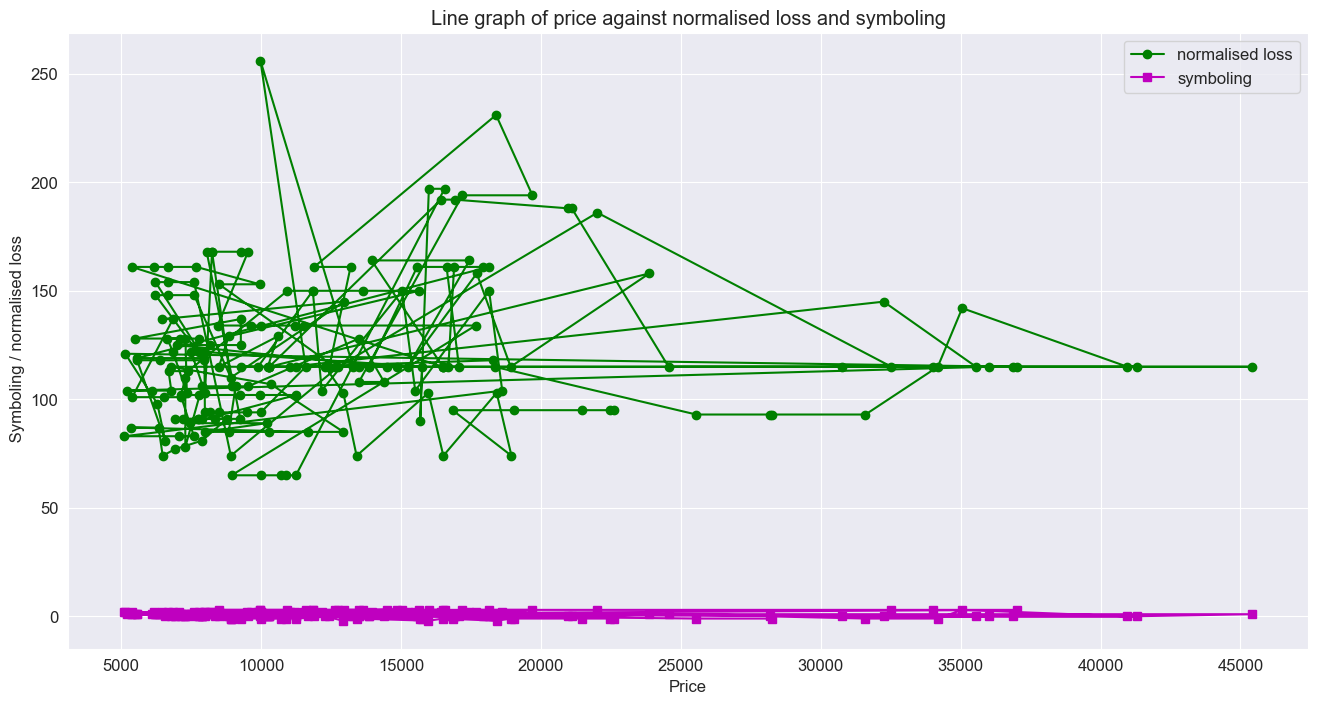

In [231]:
plt.figure(figsize=(16,8))
plt.title('Line graph of price against normalised loss and symboling')
plt.plot(automobile_df.price, automobile_df['normalized-losses'],'o-g')
plt.plot(automobile_df.price, automobile_df.symboling,'s-m')
plt.xlabel('Price')
plt.ylabel(' Symboling / normalised loss')
plt.legend(['normalised loss','symboling'])
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 12

the line graph doesnt seem to offer alot of insight but when considered as a scatter plot, we can identidy that most of the cars are of low price and low normalised loss evidenced by most of the markers in the bottom left quadrant.

### Making Scatter Plots

this will help identify the relationship between price and normalised loss and even symboling better on the basis of brand, body style, drive wheels, fuel type, number of cylinders and engine location

<Axes: title={'center': 'normalised loss vs price, hue: brand'}, xlabel='price', ylabel='normalized-losses'>

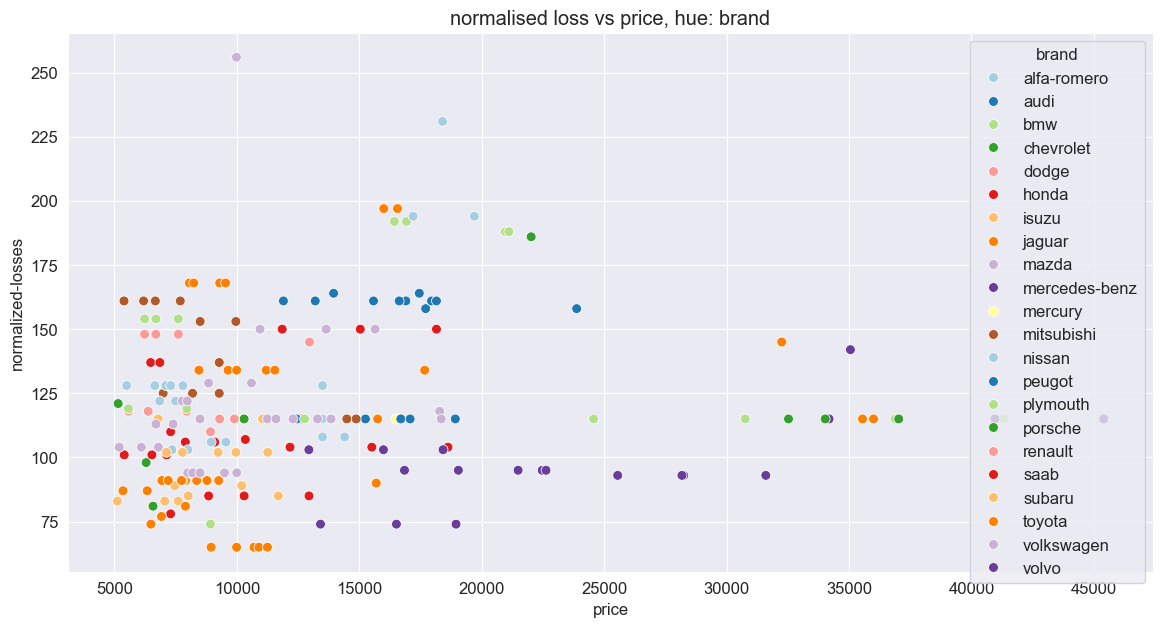

In [232]:
plt.figure(figsize=(14,7))
plt.title('normalised loss vs price, hue: brand')
sns.scatterplot(x='price',y='normalized-losses', hue='brand',palette='Paired',s=50,data=automobile_df)

from the scatter plot ,
*  we can see that most of the vehicles are in the low price range(below 20,000) and have low normalised loses (below 175)
* few cars ar in the high price range (above 20,000) with low normalised loses (below 175)
* And extremely few cars have a low price with a high normalised loss

possible explanation:
* none yet

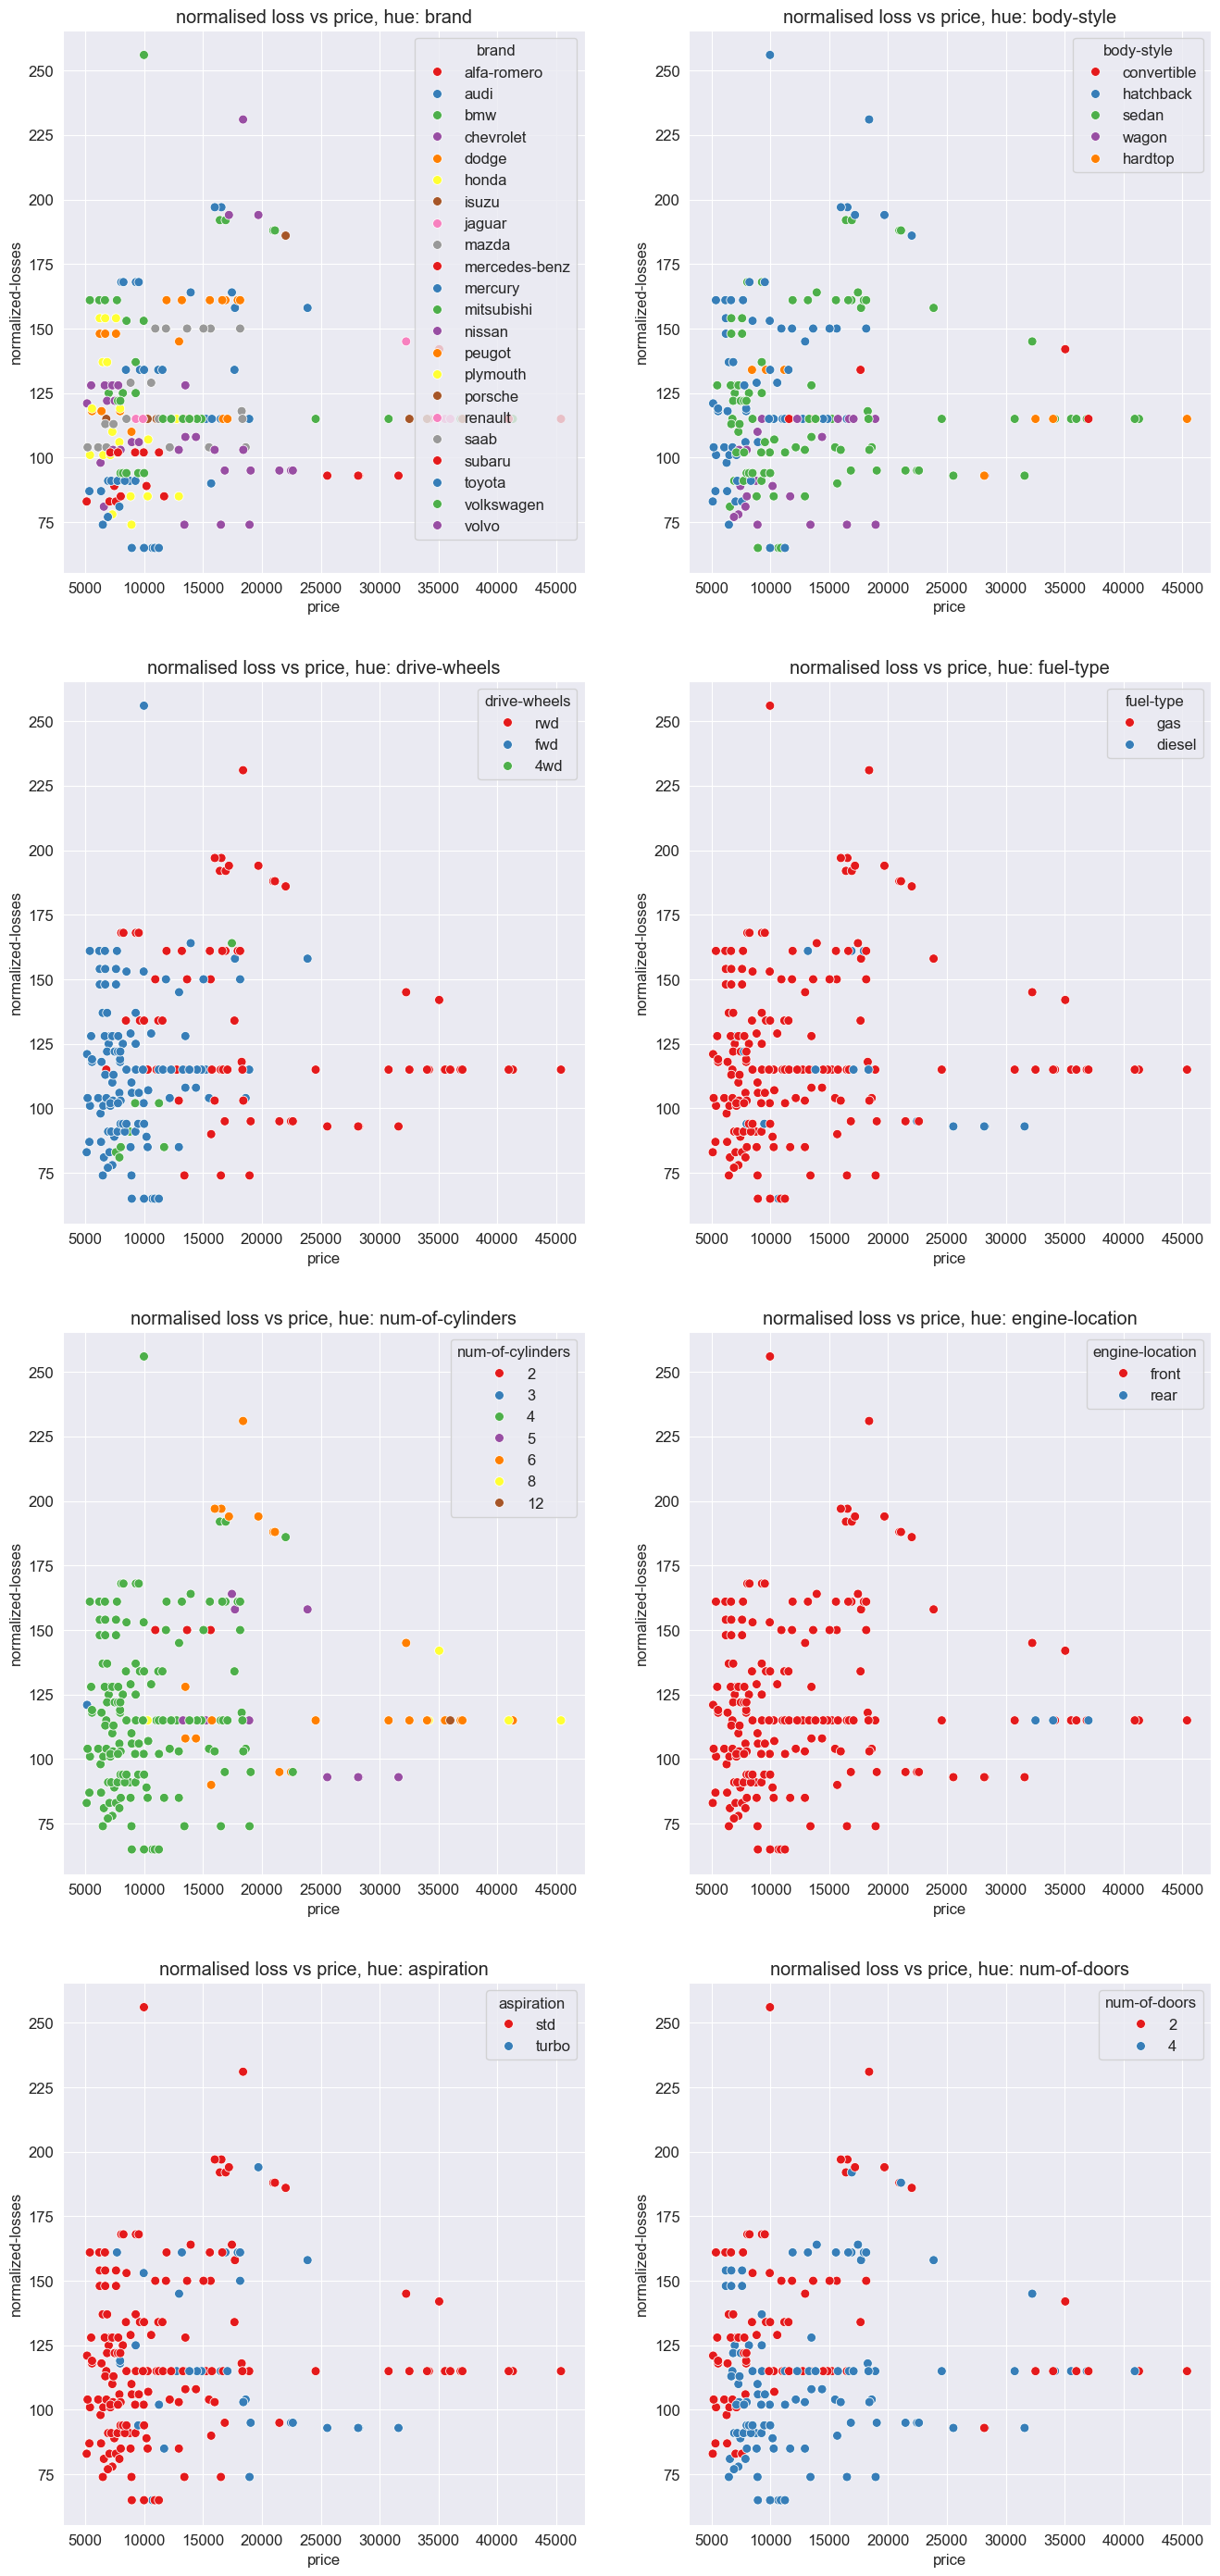

In [233]:
# making multiple plots of the same graph to just the difference in insights from hues

fig, axes = plt.subplots(4,2, figsize=(16,35))

# graph syntax

''' axes[0,0].set_title('normalised loss vs price, hue: brand')
sns.scatterplot(x='price',y='normalized-losses', hue='brand',s=50,data=automobile_df, ax = axes[0,0]) '''

# loop to execute the entire repetitive task
# brand, body style, drive wheels, fuel type, number of cylinders and engine location
# aspiration, num-of-doors
plots_dict ={
    '0,0':'brand',
    '0,1':'body-style',
    '1,0':'drive-wheels',
    '1,1': 'fuel-type',
    '2,0': 'num-of-cylinders',
    '2,1': 'engine-location',
    '3,0': 'aspiration',
    '3,1': 'num-of-doors',
    }
for key,val in plots_dict.items():
    key1= int(key[0])
    key2 = int(key[-1])
    axes[key1,key2].set_title(f'normalised loss vs price, hue: {val}')
    sns.scatterplot(x='price',y='normalized-losses', hue=val,
                    s=50,data=automobile_df, palette='Set1',ax = axes[key1,key2]) 

### Insights from the price vs normalised loss multi chart:
we already noted from the data that most of the cars ar of low price and low normalised losses,


#### Based on hues , the following are the additional deductions about the data to guide anyone who wants to acquire a car:

* **Body style** : hardtops are expensive but have low normalised losses, hatchbaks and sedans come affordable to buy but the normalised loss are in the low anf high range too, wagons are mostly cheap and have a low normalised loss genrally  

* **Drive Wheels** : fwd and 4wd are cheap and have low normalised losses while rwd cars are mostly expsnsive with low normalised losses or cheap with high normalised losses

* **Fuel Type** : most of the cars are gas cars, but diesel cars have generally low normalised losses

* **Number of Cylinders** : 4-cylinders cars are the ones of low price but the normalised losses range from low to high and fairly distributed from low to high prices, 6-cylinder cars are generally expensive but have low normalised losses, 5-cylinder cars have a medium price range and medium normalised losses

* **Engine Location** : few cars have a front engine so its hard to make accurate conclusions about the relationship between engine location, normalised losses and price

* **Aspiration** : Both std and turbo cars are gerally in the low price range but the normalised losses are distributed over low and high losses, aspiration may not have a major effect in essense

* **Number of Doors** : 4-door cars have generally lower prices and lower normalised losses while 2 door cars have low prices generally but have high normalised losses.

<Axes: title={'center': 'symboling vs price, hue: brand'}, xlabel='symboling', ylabel='price'>

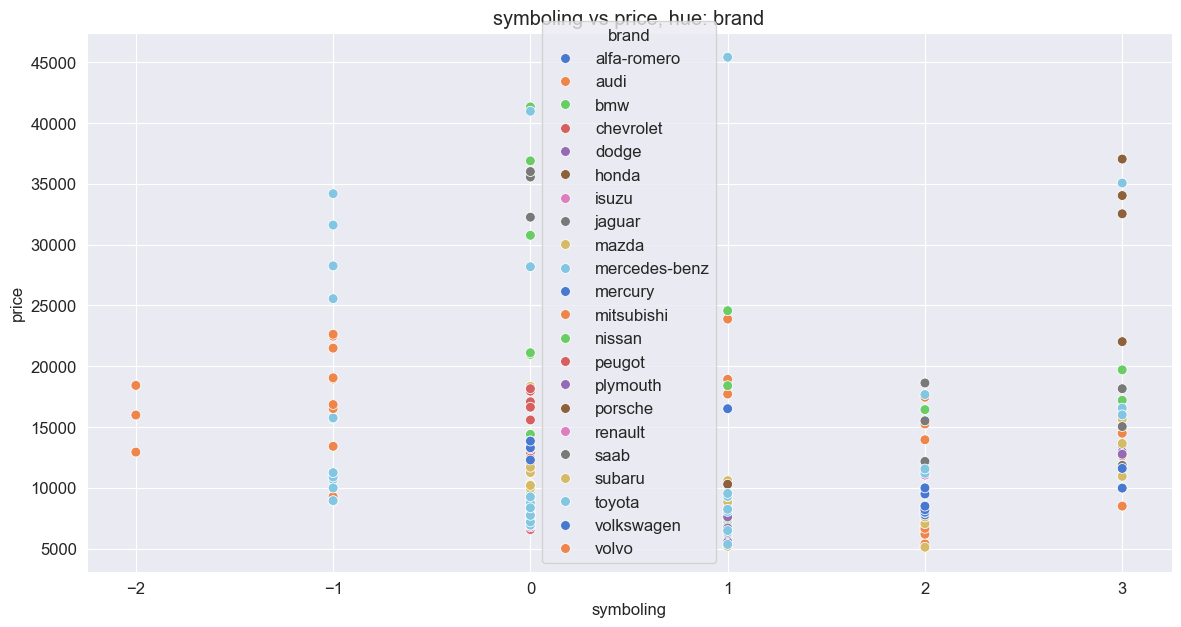

In [234]:
plt.figure(figsize=(14,7))
plt.title('symboling vs price, hue: brand')
sns.scatterplot(x='symboling',y='price',hue='brand',palette='muted',s=50, data=automobile_df)

we can deduce from th symboling and price relationship that:
* at low prices( below 10,000), the most common cars are having symboling 0,1,2 which are pretty risky
* at median prices (10,000 to 20,000), the most common cars ar having symboling 3,2,0,-1, we start to see safer symboling with increased price
* at high prices (above 20,000), the most common cars are of symboling 0, -1 which further proves a postive correlation between price and asfer symboling

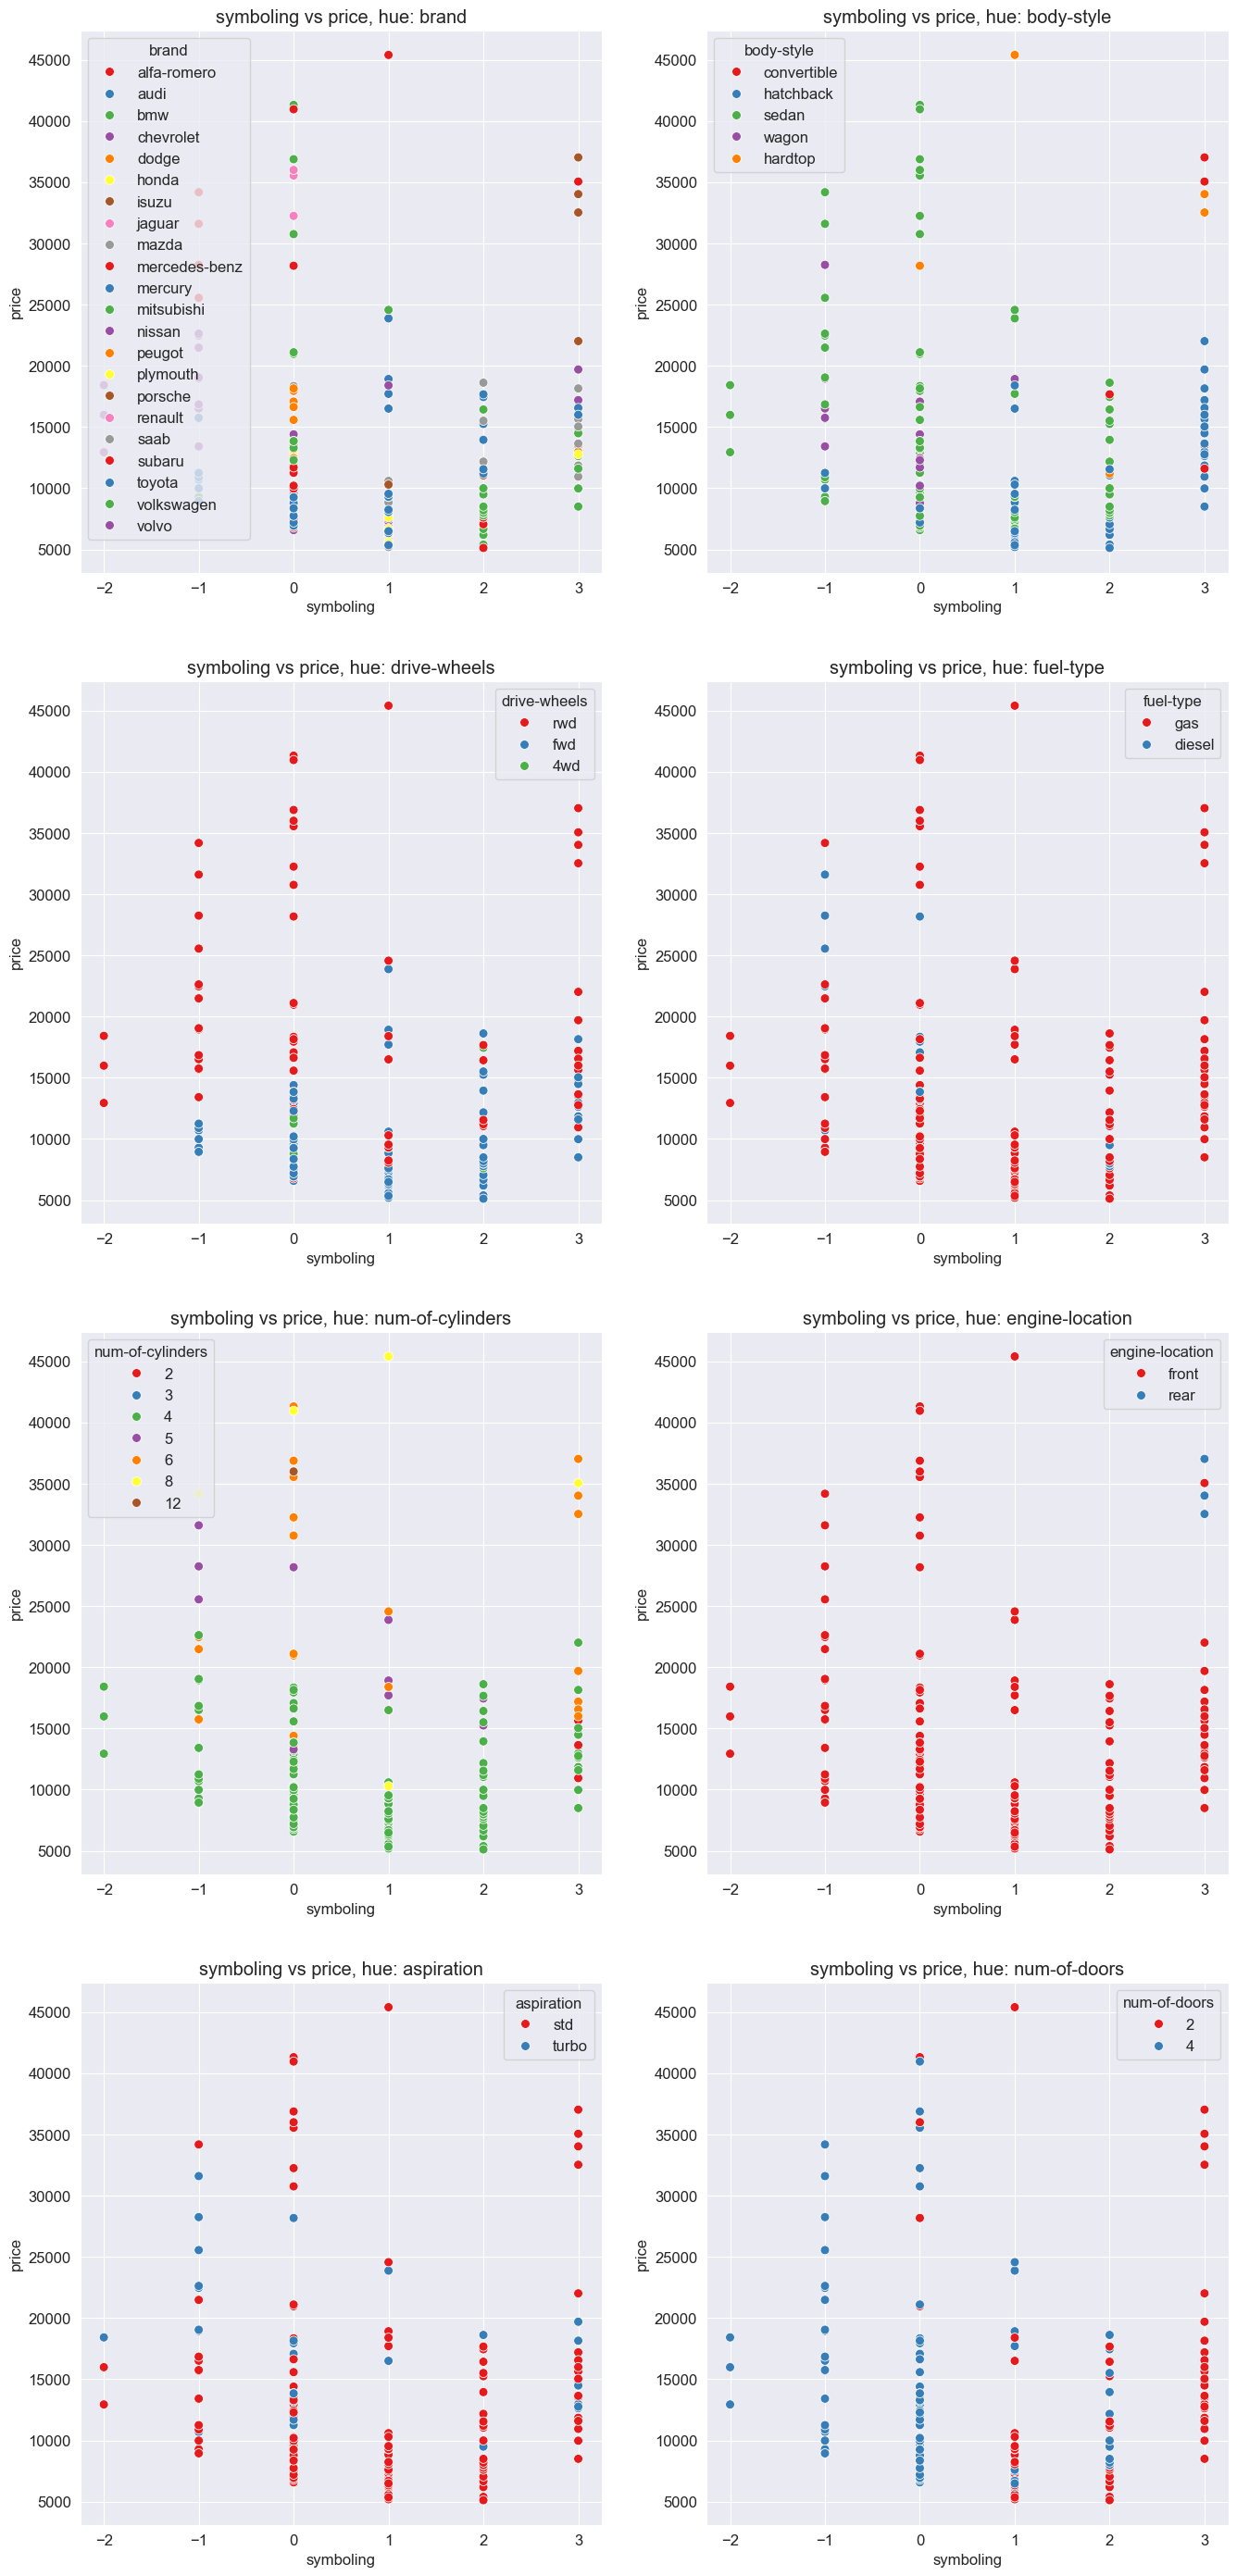

In [235]:
# making multiple plots of the same graph to just the difference in insights from hues

fig, axes = plt.subplots(4,2, figsize=(16,35))

# graph syntax

''' axes[0,0].set_title('symboling vs price, hue: brand')
sns.scatterplot(x='price',y='symboling', hue='brand',s=50,data=automobile_df, ax = axes[0,0]) '''

# loop to execute the entire repetitive task
# brand, body style, drive wheels, fuel type, number of cylinders and engine location
# aspiration, num-of-doors
plots_dict ={
    '0,0':'brand',
    '0,1':'body-style',
    '1,0':'drive-wheels',
    '1,1': 'fuel-type',
    '2,0': 'num-of-cylinders',
    '2,1': 'engine-location',
    '3,0': 'aspiration',
    '3,1': 'num-of-doors',
    }
for key,val in plots_dict.items():
    key1= int(key[0])
    key2 = int(key[-1])
    axes[key1,key2].set_title(f'symboling vs price, hue: {val}')
    sns.scatterplot(x='symboling',y='price', hue=val,palette='Set1',
                    s=50,data=automobile_df, ax = axes[key1,key2]) 

### Insights from the price vs symboling multi chart:
*


<Axes: title={'center': 'symboling vs normalised loss, hue: brand'}, xlabel='symboling', ylabel='normalized-losses'>

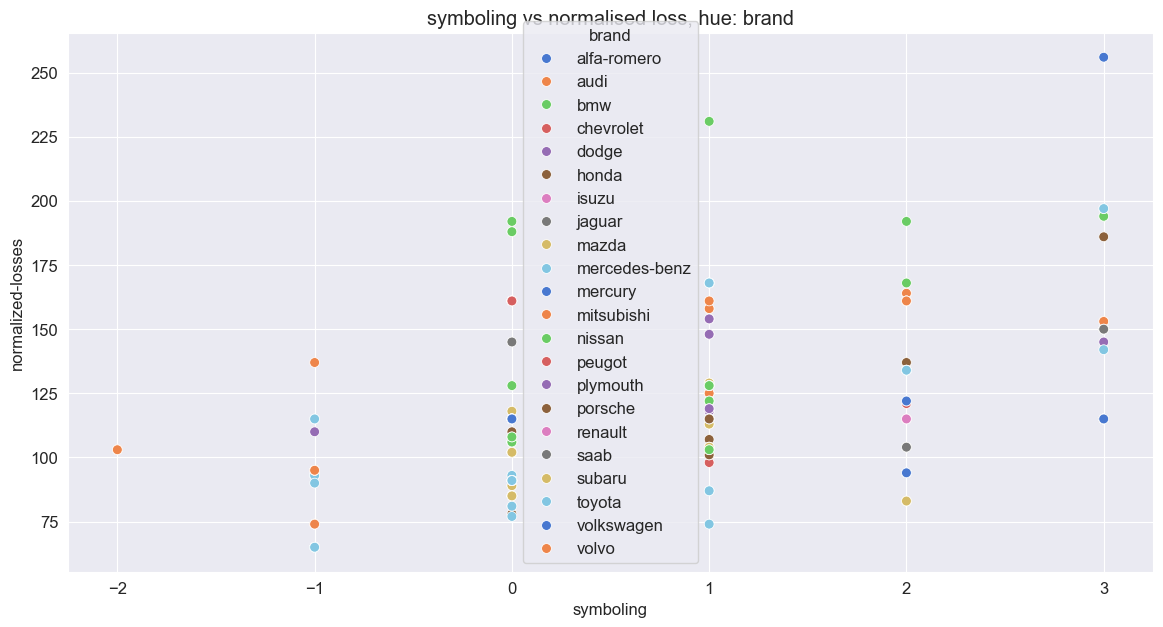

In [236]:
plt.figure(figsize=(14,7))
plt.title('symboling vs normalised loss, hue: brand')
sns.scatterplot(x='symboling',y='normalized-losses',hue='brand',palette='muted',s=50, data=automobile_df)

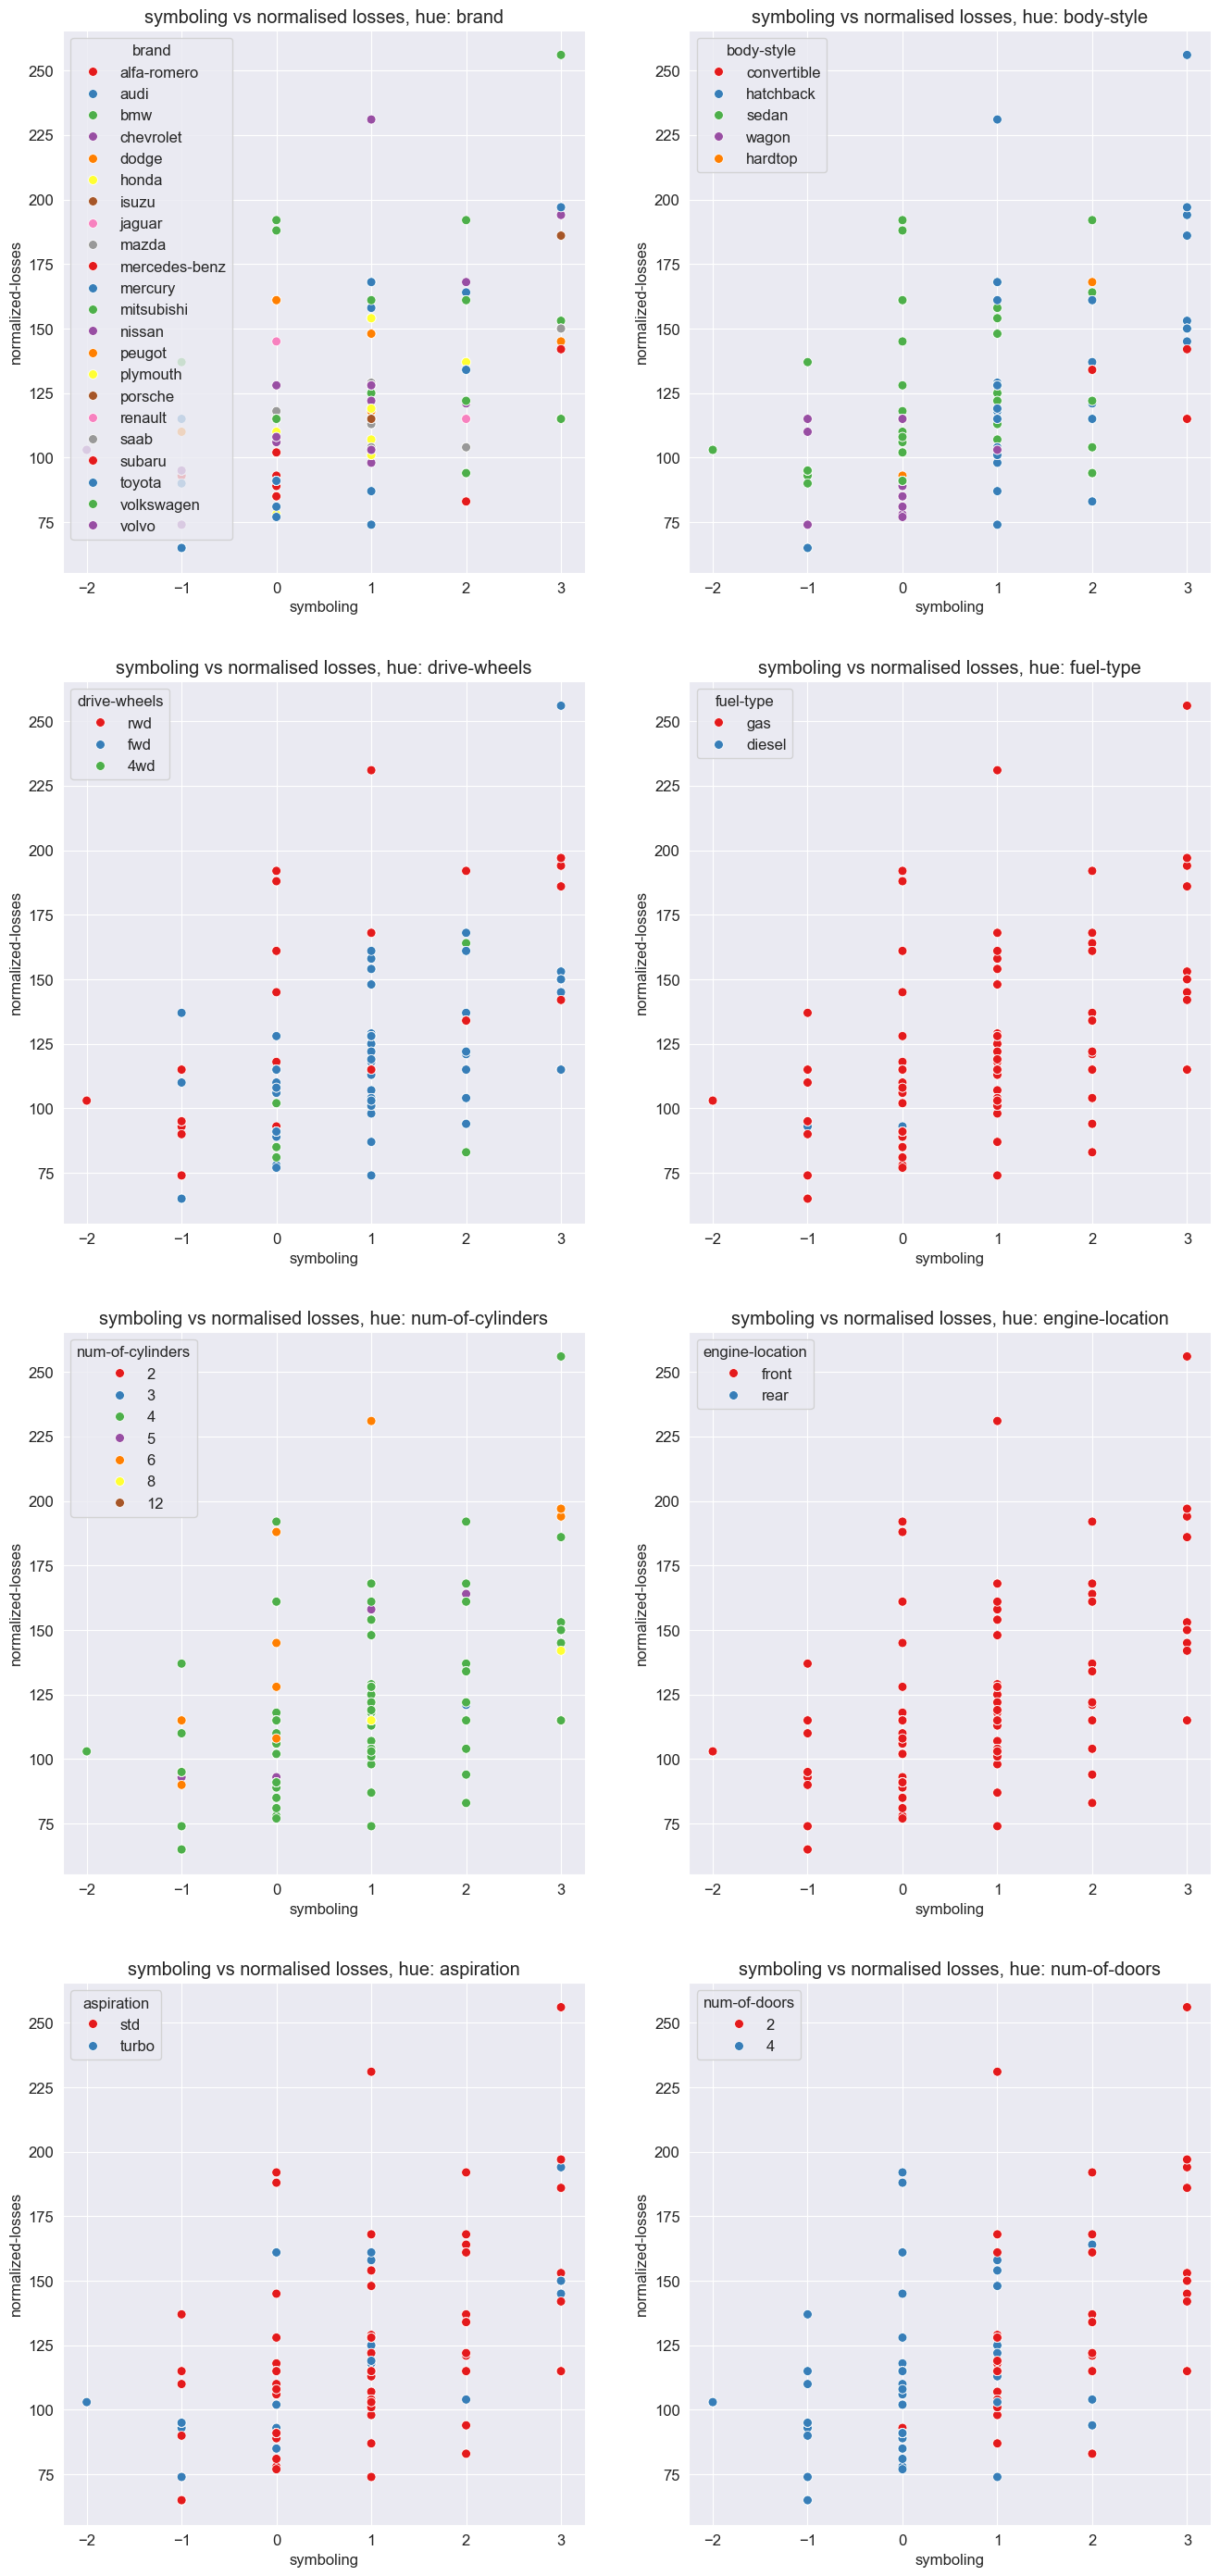

In [237]:
# making multiple plots of the same graph to just the difference in insights from hues

fig, axes = plt.subplots(4,2, figsize=(16,35))

# graph syntax

''' axes[0,0].set_title('symboling vs price, hue: brand')
sns.scatterplot(x='price',y='symboling', hue='brand',s=50,data=automobile_df, ax = axes[0,0]) '''

# loop to execute the entire repetitive task
# brand, body style, drive wheels, fuel type, number of cylinders and engine location
# aspiration, num-of-doors
plots_dict ={
    '0,0':'brand',
    '0,1':'body-style',
    '1,0':'drive-wheels',
    '1,1': 'fuel-type',
    '2,0': 'num-of-cylinders',
    '2,1': 'engine-location',
    '3,0': 'aspiration',
    '3,1': 'num-of-doors',
    }
for key,val in plots_dict.items():
    key1= int(key[0])
    key2 = int(key[-1])
    axes[key1,key2].set_title(f'symboling vs normalised losses, hue: {val}')
    sns.scatterplot(x='symboling',y='normalized-losses', hue=val,palette='Set1',
                    s=50,data=automobile_df, ax = axes[key1,key2]) 

<Axes: title={'center': 'distribution of price'}, xlabel='price', ylabel='Count'>

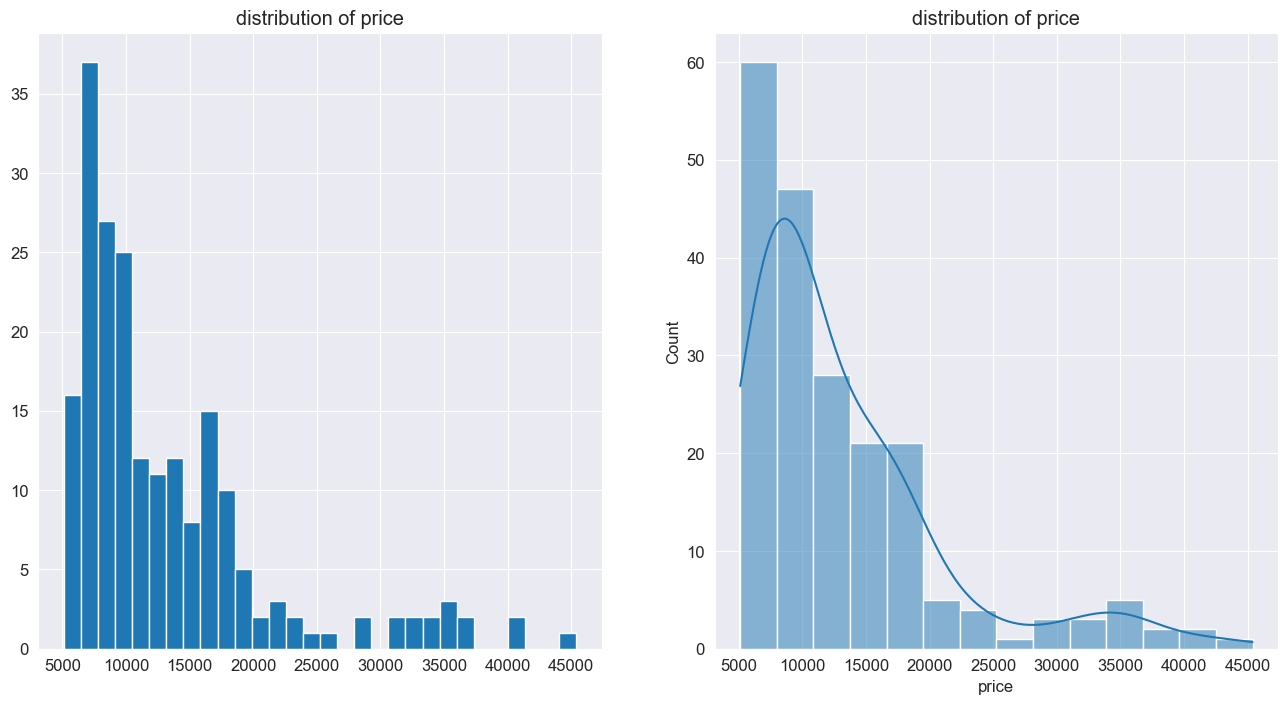

In [238]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,8))

ax1.set_title('distribution of price')
ax1.hist(automobile_df.price, bins=30)

ax2.set_title('distribution of price')
sns.histplot(automobile_df.price, kde=True, ax=ax2)

<Axes: title={'center': 'Distribution of normalised loss'}, xlabel='normalized-losses', ylabel='Count'>

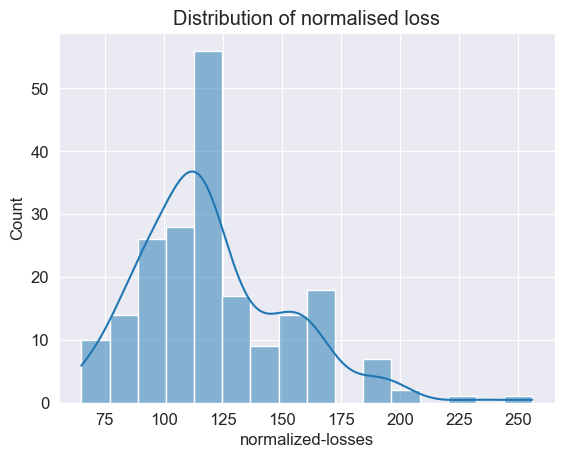

In [239]:
plt.title('Distribution of normalised loss')
sns.histplot(automobile_df['normalized-losses'],kde=True)

<Axes: title={'center': 'distribution of symboling'}, xlabel='symboling', ylabel='Count'>

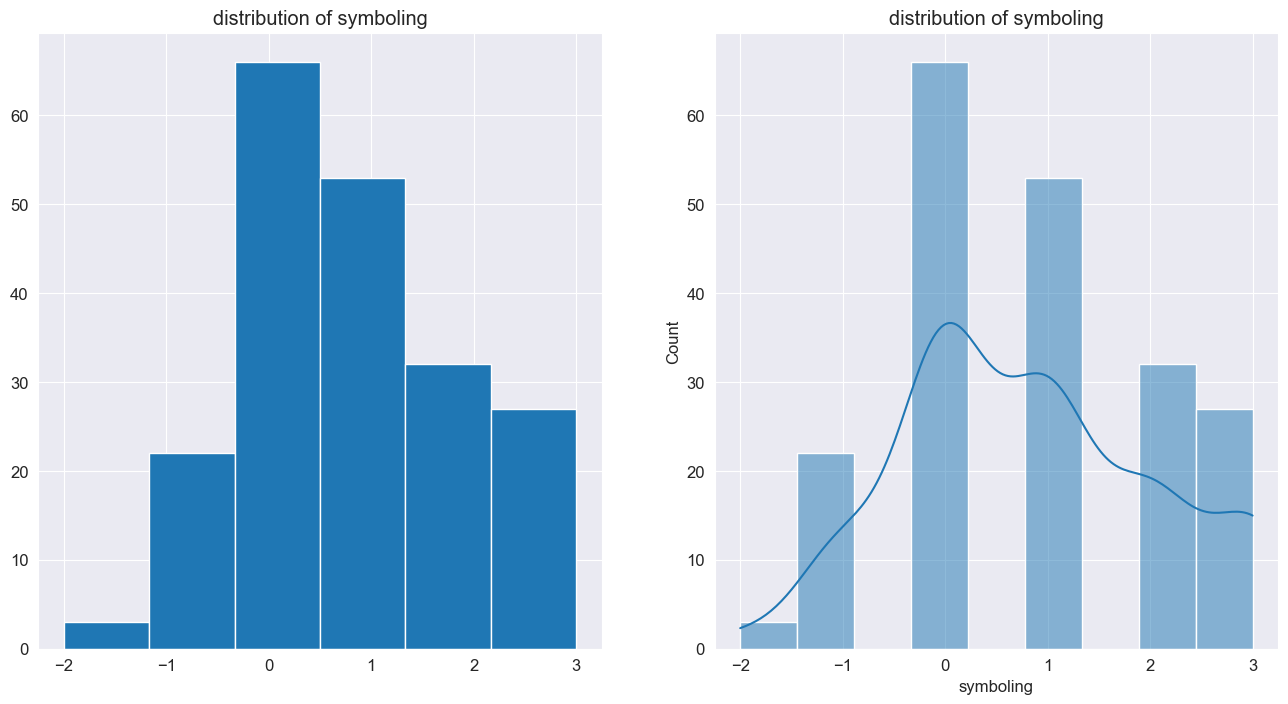

In [240]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,8))

ax1.set_title('distribution of symboling')
ax1.hist(automobile_df.symboling, bins=6)

ax2.set_title('distribution of symboling')
sns.histplot(automobile_df.symboling, kde= True, ax= ax2)

### Finding out the distribution of normalised-losses for each symboling

In [251]:

# basic code
#symboling_n3_df = automobile_df[ automobile_df['symboling']== -3 ][['normalized-losses']].copy()

def make_df(key,val):
    key =automobile_df[ automobile_df['symboling']== val ][['normalized-losses']].copy()
    return key


make_df('symboling_n2_df',-2)
make_df('symboling_n1_df',-1)
make_df('symboling_zr_df',0)
make_df('symboling_p1_df',1)
make_df('symboling_p2_df',2)
make_df('symboling_p3_df',3)


,normalized-losses
0,115
1,115
29,145
55,150
56,150
57,150
58,150
72,142
80,153
81,153
